Punto 1:

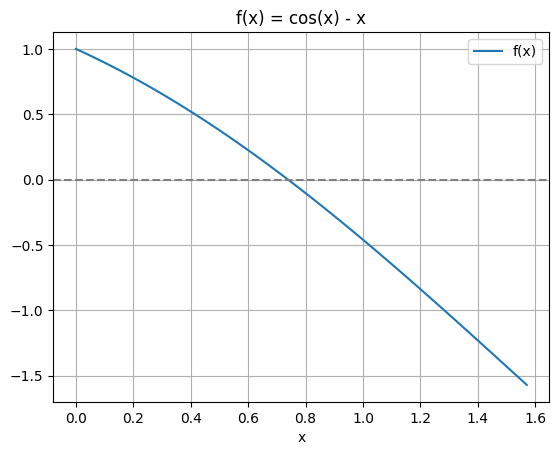

Aproximación inicial desde el DataFrame: x ≈ 0.745732, f(x) ≈ -1.11e-02
Raíz encontrada con Ridder: x ≈ 0.739085 en 2 iteraciones


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Método de Ridder para encontrar raíces
def ridder(f, a, b, tol=1e-6, max_iter=100):
    """
    Encuentra la raíz de f(x) usando el método de Ridder.
    Devuelve la raíz aproximada y el número de iteraciones.
    """
    fa = f(a)
    fb = f(b)

    # Verifico que la función cambie de signo en el intervalo
    if fa * fb > 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")

    for n in range(1, max_iter + 1):
        m = 0.5 * (a + b)      # Punto medio
        fm = f(m)
        s_sq = fm**2 - fa * fb

        # Si no se puede calcular s, detener
        if s_sq < 0:
            return None, n

        s = np.sqrt(s_sq)

        # Fórmula para el nuevo candidato a raíz
        x = m + (m - a) * np.sign(fa - fb) * fm / s
        fx = f(x)

        # Si cumple la tolerancia, terminamos
        if abs(fx) < tol or abs(b - a) < tol:
            return x, n

        # Actualizo el intervalo según el signo de f
        if fm * fx < 0:
            a, b = m, x
            fa, fb = fm, fx
        elif fa * fx < 0:
            b = x
            fb = fx
        else:
            a = x
            fa = fx

    raise RuntimeError("No convergió en el número de iteraciones dado")

# Defino la función: cos(x) - x
f = lambda x: np.cos(x) - x

# Valores de x para graficar la función
x_vals = np.linspace(0, np.pi / 2, 100)
fx_vals = f(x_vals)

# Creo un DataFrame con los valores de x y f(x)
df = pd.DataFrame({'x': x_vals, 'f(x)': fx_vals})

# Gráfico de la función
df.plot(x='x', y='f(x)', title='f(x) = cos(x) - x')
plt.axhline(0, color='gray', linestyle='--')  # línea horizontal en y=0
plt.grid(True)
plt.show()

# Busco el valor más cercano a cero en la tabla (solo para aproximación inicial)
min_row = df.iloc[(df['f(x)'].abs()).argmin()]
print(f"Aproximación inicial desde el DataFrame: x ≈ {min_row['x']:.6f}, f(x) ≈ {min_row['f(x)']:.2e}")

# Uso Ridder para encontrar la raíz
raiz, iteraciones = ridder(f, 0, np.pi / 2, tol=1e-6, max_iter=100)
print(f"Raíz encontrada con Ridder: x ≈ {raiz:.6f} en {iteraciones} iteraciones")


Punto 2:

Ángulo mínimo (Newton): 49.4642°
Ángulo mínimo (Secante): 49.4642°
Ángulo crítico de reflexión interna total: 29.4302°


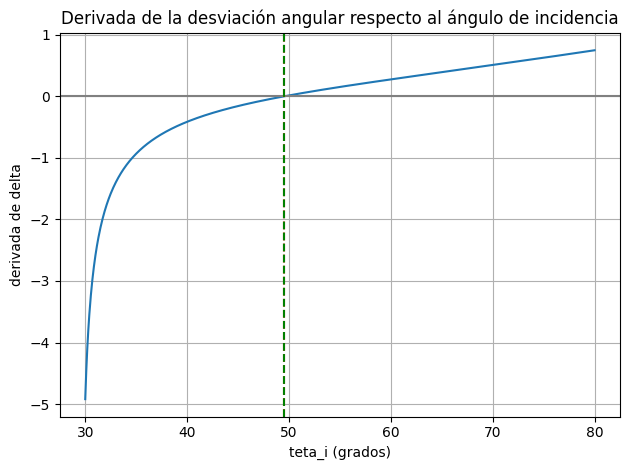

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar, bisect

# Datos del prisma
n = 1.52
A_grados = 60
A = np.radians(A_grados)

# Derivada de delta con respecto a teta_i
def derivada_delta_de_teta(teta_i):
    teta_r = np.arcsin(np.sin(teta_i) / n)
    sin_internal = np.sin(A - teta_r)
    sqrt_term = np.sqrt(1 - n**2 * sin_internal**2)
    cos_teta_i = np.cos(teta_i)
    cos_A_minus_teta_r = np.cos(A - teta_r)
    cos_teta_r = np.cos(teta_r)
    return 1 - (cos_teta_i * cos_A_minus_teta_r) / (cos_teta_r * sqrt_term)

# Encontrar donde la derivada se anula con diferentes métodos
teta_i_newton_rad = newton(func=derivada_delta_de_teta, x0=np.radians(60))
res_secante = root_scalar(derivada_delta_de_teta, method='secant', x0=np.radians(50), x1=np.radians(70))
teta_i_secant_rad = res_secante.root

# Para hallar el ángulo crítico
def condicion_critica(teta_i):
    teta_r = np.arcsin(np.sin(teta_i) / n)
    return np.sin(A - teta_r) - 1/n

teta_i_crit_rad = bisect(condicion_critica, 0.01, np.radians(50))

# Pasar a grados para mostrar
teta_i_min_deg = np.degrees(teta_i_newton_rad)
teta_i_secant_deg = np.degrees(teta_i_secant_rad)
teta_i_crit_deg = np.degrees(teta_i_crit_rad)

# Mostrar resultados
print(f"Ángulo mínimo (Newton): {teta_i_min_deg:.4f}°")
print(f"Ángulo mínimo (Secante): {teta_i_secant_deg:.4f}°")
print(f"Ángulo crítico de reflexión interna total: {teta_i_crit_deg:.4f}°")

# Graficar cómo se comporta la derivada
teta_i_vals_deg = np.linspace(30, 80, 1000)
teta_i_vals_rad = np.radians(teta_i_vals_deg)
derivative_vals = derivada_delta_de_teta(teta_i_vals_rad)

plt.plot(teta_i_vals_deg, derivative_vals, label="derivada de delta respecto a teta_i")
plt.axhline(0, color='gray')
plt.axvline(teta_i_min_deg, color='red', linestyle='--', label=f"Mínimo (Newton): {teta_i_min_deg:.2f}°")
plt.axvline(teta_i_secant_deg, color='green', linestyle='--', label=f"Mínimo (Secante): {teta_i_secant_deg:.2f}°")
plt.xlabel("teta_i (grados)")
plt.ylabel("derivada de delta")
plt.title("Derivada de la desviación angular respecto al ángulo de incidencia")
plt.grid(True)
plt.tight_layout()
plt.show()
